In [1]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

sns.set_theme() 

%config InlineBackend.figure_format = 'retina'  
%config InlineBackend.print_figure_kwargs = {'dpi': 150}  

In [2]:
data_dir = Path('Data')
output_dir = Path('Output')
output_dir.mkdir(exist_ok=True)

In [3]:
ml_results = pd.read_csv(data_dir / 'MultiLing' / 'results_multiling.csv')

In [4]:
ml_results.head()

,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
0,de,gpt-4-turbo-2024-04-09,85.56,100.00,85.56,NaN
1,de,claude-3-opus-20240229,71.11,100.00,71.11,NaN
2,de,Llama-3-70b-chat-hf,58.33,100.00,58.33,NaN
3,de,Llama-3-8b-chat-hf,42.77,98.33,43.50,0.0
4,de,command-r-plus,37.22,100.00,37.22,NaN


In [5]:
ml_results.model = ml_results.model.str.replace(r'fsc-', r'').str.lower()

In [6]:
score_col = ml_results.columns[2]
played_col = ml_results.columns[3]
quality_col = ml_results.columns[4]

In [7]:
lang_groups = ml_results.groupby(['lang'])

In [8]:
for lang, df in lang_groups:
    display(df)

,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
0,de,gpt-4-turbo-2024-04-09,85.56,100.00,85.56,NaN
1,de,claude-3-opus-20240229,71.11,100.00,71.11,NaN
2,de,llama-3-70b-chat-hf,58.33,100.00,58.33,NaN
3,de,llama-3-8b-chat-hf,42.77,98.33,43.50,0.0
4,de,command-r-plus,37.22,100.00,37.22,NaN
5,de,openchat-3.5-0106,35.00,98.33,35.59,100.0


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
6,en,gpt-4-turbo-2024-04-09,87.22,100.00,87.22,NaN
7,en,claude-3-opus-20240229,77.22,100.00,77.22,NaN
8,en,llama-3-70b-chat-hf,62.78,100.00,62.78,NaN
9,en,llama-3-8b-chat-hf,47.78,100.00,47.78,NaN
10,en,command-r-plus,38.33,99.44,38.55,0.0
11,en,openchat-3.5-0106,35.56,100.00,35.56,NaN


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
12,it,gpt-4-turbo-2024-04-09,89.44,100.00,89.44,NaN
13,it,claude-3-opus-20240229,72.22,100.00,72.22,NaN
14,it,llama-3-70b-chat-hf,66.67,100.00,66.67,NaN
15,it,command-r-plus,38.33,100.00,38.33,NaN
16,it,llama-3-8b-chat-hf,37.78,100.00,37.78,NaN
17,it,openchat-3.5-0106,25.56,46.67,54.76,100.0


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
18,ja,gpt-4-turbo-2024-04-09,85.56,100.00,85.56,NaN
19,ja,claude-3-opus-20240229,68.89,100.00,68.89,NaN
20,ja,llama-3-70b-chat-hf,56.11,100.00,56.11,NaN
21,ja,llama-3-8b-chat-hf,38.89,98.89,39.33,100.0
22,ja,command-r-plus,36.11,100.00,36.11,NaN
23,ja,openchat-3.5-0106,36.11,100.00,36.11,NaN


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
24,pt,gpt-4-turbo-2024-04-09,81.11,100.0,81.11,NaN
25,pt,claude-3-opus-20240229,73.33,100.0,73.33,NaN
26,pt,llama-3-70b-chat-hf,60.56,100.0,60.56,NaN
27,pt,llama-3-8b-chat-hf,46.11,100.0,46.11,NaN
28,pt,command-r-plus,37.22,100.0,37.22,NaN
29,pt,openchat-3.5-0106,28.34,50.0,56.67,100.0


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
30,te,claude-3-opus-20240229,52.22,100.00,52.22,NaN
31,te,llama-3-70b-chat-hf,45.00,99.44,45.25,0.0
32,te,gpt-4-turbo-2024-04-09,35.00,99.44,35.20,0.0
33,te,llama-3-8b-chat-hf,30.00,87.78,34.18,100.0
34,te,command-r-plus,25.00,83.89,29.80,0.0
35,te,openchat-3.5-0106,NaN,0.00,NaN,100.0


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
36,tk,gpt-4-turbo-2024-04-09,73.89,98.33,75.14,0.00
37,tk,claude-3-opus-20240229,61.11,100.00,61.11,NaN
38,tk,llama-3-70b-chat-hf,36.11,100.00,36.11,NaN
39,tk,command-r-plus,21.11,67.78,31.15,48.28
40,tk,llama-3-8b-chat-hf,10.00,28.89,34.62,72.66
41,tk,openchat-3.5-0106,NaN,0.00,NaN,100.00


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
42,tr,claude-3-opus-20240229,58.89,100.0,58.89,NaN
43,tr,gpt-4-turbo-2024-04-09,50.00,100.0,50.00,NaN
44,tr,llama-3-70b-chat-hf,45.00,100.0,45.00,NaN
45,tr,command-r-plus,35.56,100.0,35.56,NaN
46,tr,llama-3-8b-chat-hf,NaN,0.0,NaN,100.0
47,tr,openchat-3.5-0106,NaN,0.0,NaN,100.0


,lang,model,clemscore (Played * Success),% Played,% Success (of Played),Aborted at Player 1 (of Aborted)
48,zh,llama-3-70b-chat-hf,68.89,100.00,68.89,NaN
49,zh,claude-3-opus-20240229,68.89,100.00,68.89,NaN
50,zh,gpt-4-turbo-2024-04-09,64.45,72.78,88.55,0.0
51,zh,command-r-plus,38.33,99.44,38.55,0.0
52,zh,llama-3-8b-chat-hf,35.00,100.00,35.00,NaN
53,zh,openchat-3.5-0106,18.89,46.67,40.48,100.0


In [9]:
models = lang_groups.get_group(('de',)).model.tolist()

In [10]:
def get_lang_metrics(grouped_data, metric_column):
    """
    Create a DataFrame of model performance across languages for a specific metric
    """
    models = grouped_data.get_group(('de',)).model.tolist()  # Use German as reference
    model_metrics = {}
    
    for model in models:
        lang_results = {}
        for lang, df in grouped_data:
            lang_results[lang] = df[df.model == model][metric_column].values[0]
        model_metrics[model] = lang_results
        
    return pd.DataFrame(model_metrics).transpose()

In [11]:
def create_delta_table(df, reference_lang):
    """
    Create table with absolute values and deltas relative to reference language
    """
    output_df = df.copy(deep=True)
    delta_df = df.subtract(df[reference_lang].values, axis=0)
    
    output_df = output_df.astype(str).copy()
    
    for index, row in output_df.iterrows():
        for column in output_df.columns:
            value = df.loc[index, column]
            delta = delta_df.loc[index, column]
            output_df.loc[index, column] = f"{value:.2f} ({delta:.2f})"
    
    return output_df

In [12]:
played_metrics = get_lang_metrics(lang_groups, played_col)
quality_metrics = get_lang_metrics(lang_groups, quality_col)

In [13]:
played_metrics

,de,en,it,ja,pt,te,tk,tr,zh
gpt-4-turbo-2024-04-09,100.00,100.00,100.00,100.00,100.0,99.44,98.33,100.0,72.78
claude-3-opus-20240229,100.00,100.00,100.00,100.00,100.0,100.00,100.00,100.0,100.00
llama-3-70b-chat-hf,100.00,100.00,100.00,100.00,100.0,99.44,100.00,100.0,100.00
llama-3-8b-chat-hf,98.33,100.00,100.00,98.89,100.0,87.78,28.89,0.0,100.00
command-r-plus,100.00,99.44,100.00,100.00,100.0,83.89,67.78,100.0,99.44
openchat-3.5-0106,98.33,100.00,46.67,100.00,50.0,0.00,0.00,0.0,46.67


In [14]:
quality_metrics

,de,en,it,ja,pt,te,tk,tr,zh
gpt-4-turbo-2024-04-09,85.56,87.22,89.44,85.56,81.11,35.20,75.14,50.00,88.55
claude-3-opus-20240229,71.11,77.22,72.22,68.89,73.33,52.22,61.11,58.89,68.89
llama-3-70b-chat-hf,58.33,62.78,66.67,56.11,60.56,45.25,36.11,45.00,68.89
llama-3-8b-chat-hf,43.50,47.78,37.78,39.33,46.11,34.18,34.62,NaN,35.00
command-r-plus,37.22,38.55,38.33,36.11,37.22,29.80,31.15,35.56,38.55
openchat-3.5-0106,35.59,35.56,54.76,36.11,56.67,NaN,NaN,NaN,40.48


In [15]:
played_delta = create_delta_table(played_metrics, 'en')
quality_delta = create_delta_table(quality_metrics, 'en')

In [16]:
played_delta

,de,en,it,ja,pt,te,tk,tr,zh
gpt-4-turbo-2024-04-09,100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),99.44 (-0.56),98.33 (-1.67),100.00 (0.00),72.78 (-27.22)
claude-3-opus-20240229,100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00)
llama-3-70b-chat-hf,100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),100.00 (0.00),99.44 (-0.56),100.00 (0.00),100.00 (0.00),100.00 (0.00)
llama-3-8b-chat-hf,98.33 (-1.67),100.00 (0.00),100.00 (0.00),98.89 (-1.11),100.00 (0.00),87.78 (-12.22),28.89 (-71.11),0.00 (-100.00),100.00 (0.00)
command-r-plus,100.00 (0.56),99.44 (0.00),100.00 (0.56),100.00 (0.56),100.00 (0.56),83.89 (-15.55),67.78 (-31.66),100.00 (0.56),99.44 (0.00)
openchat-3.5-0106,98.33 (-1.67),100.00 (0.00),46.67 (-53.33),100.00 (0.00),50.00 (-50.00),0.00 (-100.00),0.00 (-100.00),0.00 (-100.00),46.67 (-53.33)


In [17]:
quality_delta

,de,en,it,ja,pt,te,tk,tr,zh
gpt-4-turbo-2024-04-09,85.56 (-1.66),87.22 (0.00),89.44 (2.22),85.56 (-1.66),81.11 (-6.11),35.20 (-52.02),75.14 (-12.08),50.00 (-37.22),88.55 (1.33)
claude-3-opus-20240229,71.11 (-6.11),77.22 (0.00),72.22 (-5.00),68.89 (-8.33),73.33 (-3.89),52.22 (-25.00),61.11 (-16.11),58.89 (-18.33),68.89 (-8.33)
llama-3-70b-chat-hf,58.33 (-4.45),62.78 (0.00),66.67 (3.89),56.11 (-6.67),60.56 (-2.22),45.25 (-17.53),36.11 (-26.67),45.00 (-17.78),68.89 (6.11)
llama-3-8b-chat-hf,43.50 (-4.28),47.78 (0.00),37.78 (-10.00),39.33 (-8.45),46.11 (-1.67),34.18 (-13.60),34.62 (-13.16),nan (nan),35.00 (-12.78)
command-r-plus,37.22 (-1.33),38.55 (0.00),38.33 (-0.22),36.11 (-2.44),37.22 (-1.33),29.80 (-8.75),31.15 (-7.40),35.56 (-2.99),38.55 (0.00)
openchat-3.5-0106,35.59 (0.03),35.56 (0.00),54.76 (19.20),36.11 (0.55),56.67 (21.11),nan (nan),nan (nan),nan (nan),40.48 (4.92)


In [18]:
played_delta.to_latex(output_dir / 'multiling_played.tex')
quality_delta.to_latex(output_dir / 'multiling_quality.tex')

### Plot

In [19]:
plot_params = {
    'kind': 'bar',
    'rot': 0,
    'subplots': True,
    'ylim': (-50, 10),
    'legend': False,
    'figsize': (10, 7)
}

In [20]:
def plot_language_deltas(df, reference_lang='en', title=None, save_path=None):
    delta_plot = (df.subtract(df[reference_lang].values, axis=0)
                   .drop(reference_lang, axis=1)
                   .T.plot(**plot_params))
    if title:
        plt.suptitle(title)
    # plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    return delta_plot

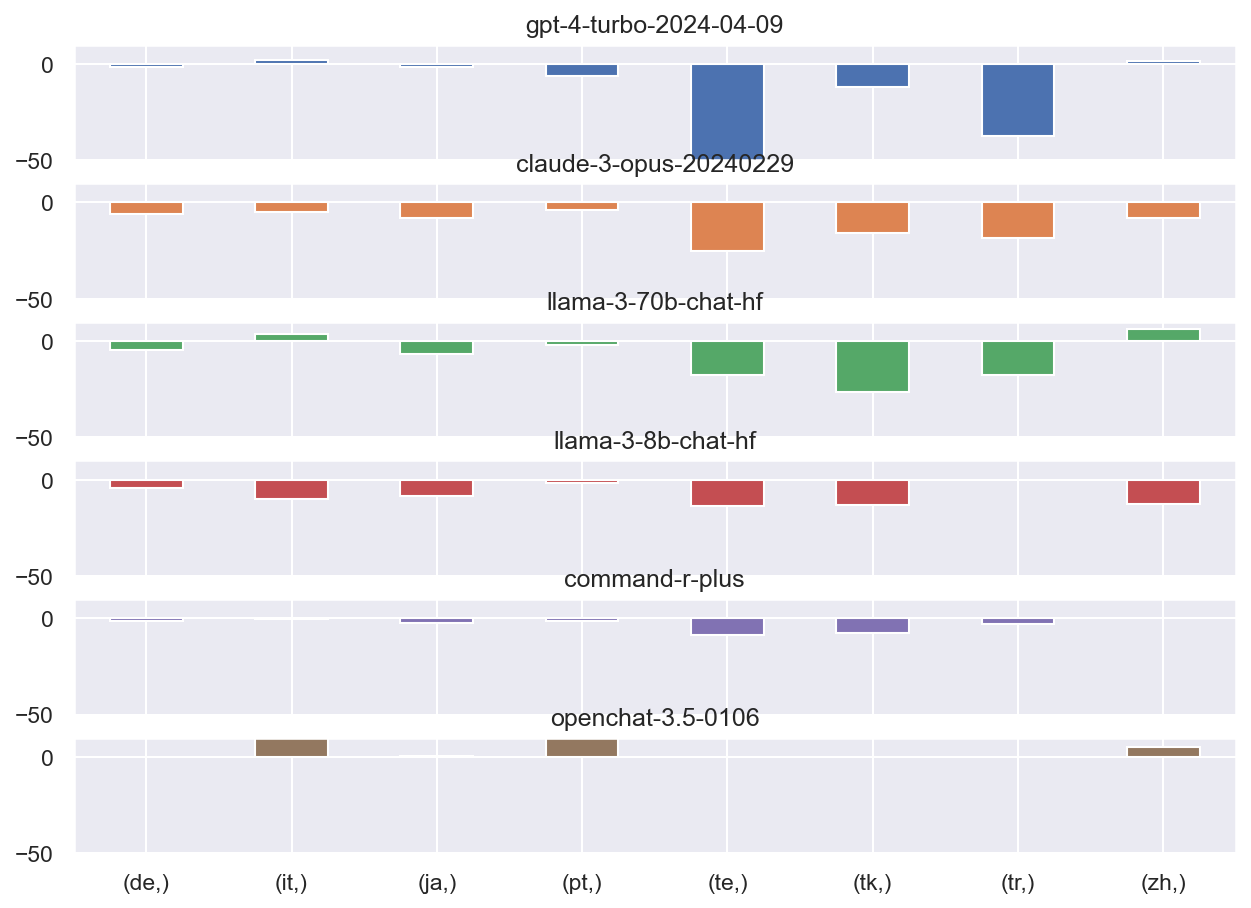

In [21]:
quality_plot = plot_language_deltas(quality_metrics, save_path=output_dir / 'multiling_quality_delta.png')

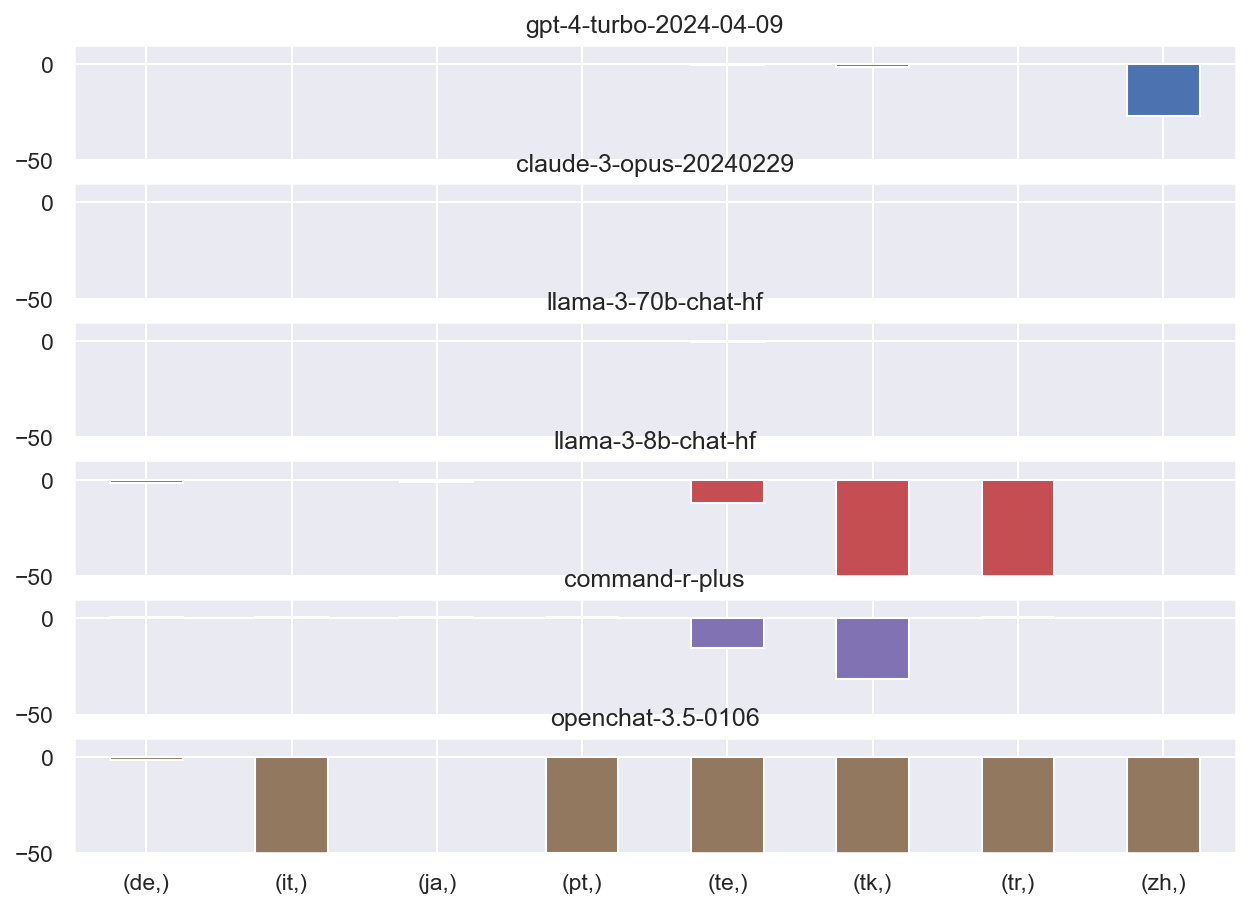

In [22]:
played_plot = plot_language_deltas(played_metrics, save_path=output_dir / 'multiling_played_delta.png')